# Demonstrate a Simple Perceptron Model

We will demonstrate this with a conversion of Celcius to Farenheit

- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**

![thermometer](resources/thermometer.png)

## Library Imports

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## Load the Dataset

In [33]:
# Load the data as dataframe
df = pd.read_csv("resources/Celsius_to_Fahrenheit.csv")
# Check few initial rowa
df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [34]:
# See the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


## Visualize the data

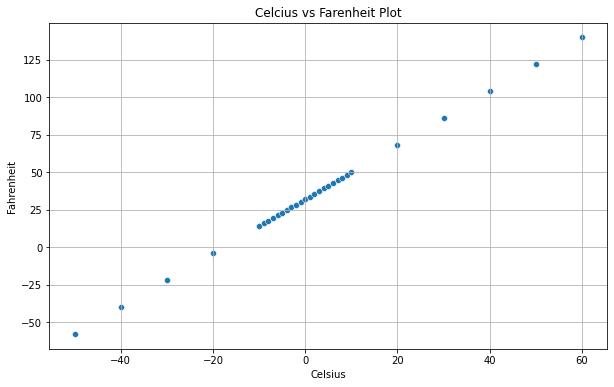

In [35]:
# Visualize the two attributes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Celsius', y='Fahrenheit', data=df)
plt.title('Celcius vs Farenheit Plot')
plt.grid(True)

## Create Test and Training Set

In [36]:
X_train = df['Celsius']
y_train = df['Fahrenheit']

print(f"Shape of Training Feature - {X_train.shape}")
print(f"Shape of target feature - {y_train.shape}")

Shape of Training Feature - (30,)
Shape of target feature - (30,)


## Build and Train the Model

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units =1, input_shape=[1])) # We will just use one neuron network

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.6), loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the model
epochs_hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 222ms/step - loss: 4842.2427
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 3312.1555
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 2162.8701
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1388.8729
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 964.9504
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 837.0940
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 918.4572
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 1100.0392
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 1277.9918
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 1381.8083
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 1384.6583
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 1295.0891
Epoch 13/100
1/1 [=======

## Evaluating the Model

In [39]:
# The tained model object has many keys - which is a dictionary
epochs_hist.history.keys()

dict_keys(['loss'])

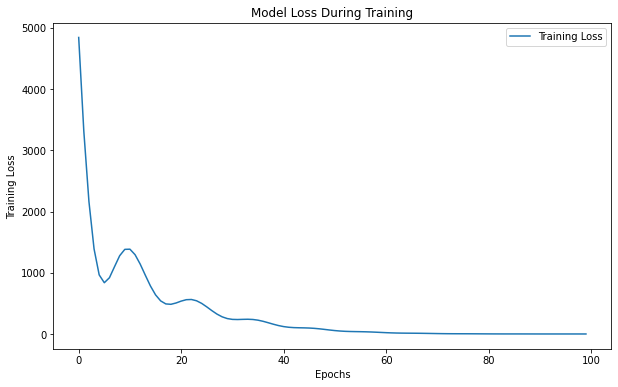

In [40]:
# Plot the Loss progress during training
plt.figure(figsize=(10, 6))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [41]:
# Check the weights
model.get_weights()

[array([[1.8010323]], dtype=float32), array([32.006775], dtype=float32)]

1/1 [==============================] - 0s 21ms/step


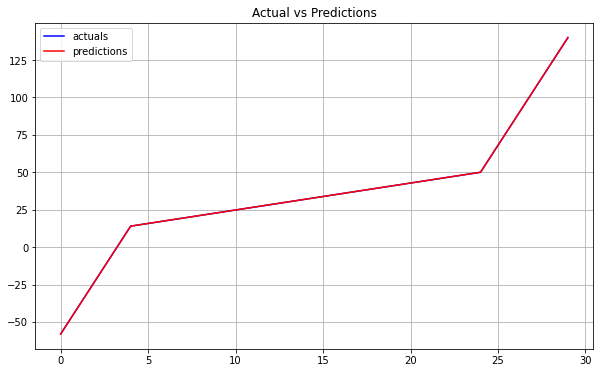

In [53]:
predictions = model.predict([X_train])

# We will plot the predictions vs actuals
plt.figure(figsize=(10, 6))
plt.plot(y_train, color='b')
plt.plot(predictions, color='r')
plt.legend(['actuals', 'predictions'])
plt.title('Actual vs Predictions')
plt.grid(True)

In [44]:
# We will use the trained model to perform predictions
Temp_C = -32
Temp_F = model.predict([Temp_C])
print(f"Prediction using the trained Model - {Temp_F}")

1/1 [==============================] - 0s 31ms/step
Prediction using the trained Model - [[-25.626259]]


In [45]:
# Lets verify this with the equation
Temp_F = 9/5 * Temp_C + 32
print(f"Prediction using the equation - {Temp_F}")

Prediction using the equation - -25.6
